In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
from scipy.spatial.distance import cdist

\newpage
## 8-2-1

In [2]:
#Kernel test W,X,sigma
import numpy as np
W_test = np.array([[1,2,3],[4,5,6]])
X_test = np.array([[2,3,4],[5,6,7]])
sigma = 1

In [3]:
from scipy.spatial.distance import cdist
def linear_kernel(W, X):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
    Returns:
        matrix of size n1xn2, with w_i^T x_j in position i,j
    """
    return np.dot(W,np.transpose(X))

def RBF_kernel(W,X,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||w_i-x_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    diff_mat = cdist(W,X,'sqeuclidean')
    return np.exp(-(diff_mat**2)/(2*sigma**2))

def polynomial_kernel(W, X, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <w_i,x_j>)^degree in position i,j
    """
    #TODO
    return (offset+linear_kernel(W,X))**degree

\newpage
## 8-2-2

In [4]:
def linear_kernel(W, X):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
    Returns:
        matrix of size n1xn2, with w_i^T x_j in position i,j
    """
    return np.dot(W,np.transpose(X))
X0=[[1],[2],[3],[4]]
linear_kernel(X0,X0)

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

\newpage
## 8-2-3

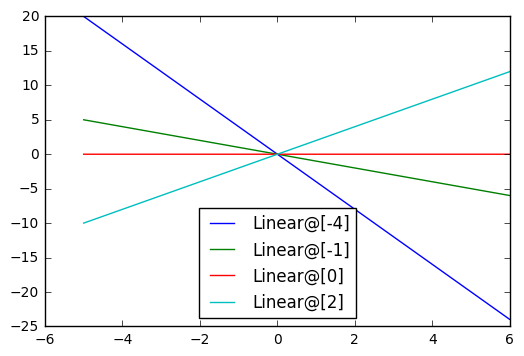

In [5]:
import matplotlib.pyplot as plt
plot_step = .01
xpts = np.arange(-5.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

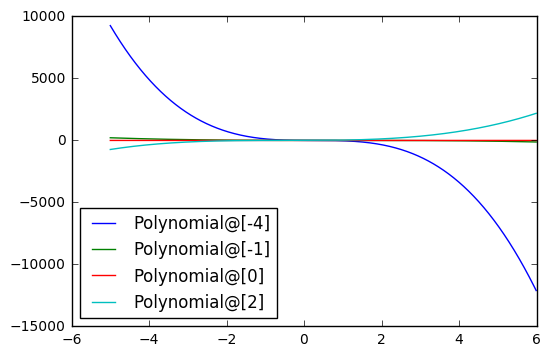

In [6]:
# Poly Kernel
y = polynomial_kernel(prototypes, xpts,1,3) 
for i in range(len(prototypes)):
    label = "Polynomial@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

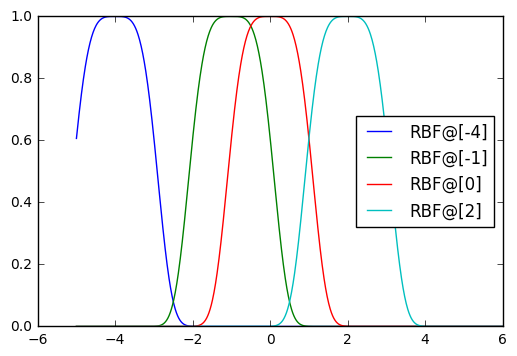

In [7]:
# RBF Kernel
y = RBF_kernel(prototypes, xpts,1) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

\newpage
## 8-2-4

In [8]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(W,X) - a function return the cross-kernel matrix between rows of W and rows of X for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        # TODO
        xX = self.kernel(X,self.prototype_points)
        return np.dot(xX,self.weights)

In [9]:
from functools import partial
prototype_points = np.array([-1,0,1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)
x=np.array([-4,1,0,2]).reshape(-1,1)
k = partial(RBF_kernel,sigma=1)
machine = Kernel_Machine(k,prototype_points,weights)

In [10]:
machine.predict(x)

array([[  2.57675711e-18],
       [  3.93804803e-01],
       [  2.13061319e-01],
       [  6.06195197e-01]])

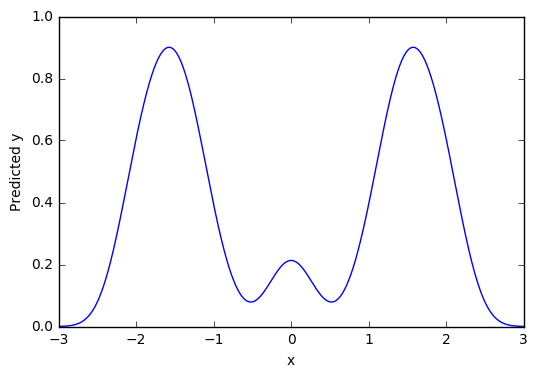

In [11]:
#Plot the result function
plot_step = .001
xpts = np.arange(-3 , 3, plot_step).reshape(-1,1)
plt.plot(xpts, machine.predict(xpts), label=label)
plt.xlabel('x')
plt.ylabel('Predicted y')
plt.show()

\newpage
# 8-3 Kernel Ridge Regression

## 8-3-1 Show data

In [12]:
data_train,data_test = np.loadtxt("../krr-train.txt"),np.loadtxt("../krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

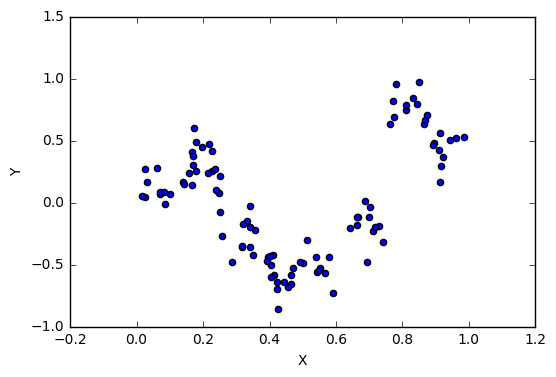

In [13]:
plt.scatter(x_train,y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

As we seen X and Y are non lienar and there is a clear twist at x=0.5

\newpage
## 8-3-2

In [14]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    K = kernel(X,X)
    dim_K = K.shape[0]
    alpha = np.linalg.inv((np.identity(dim_K)*l2reg+K)).dot(y)
    return Kernel_Machine(kernel, X, alpha)

\newpage
## 8-3-3

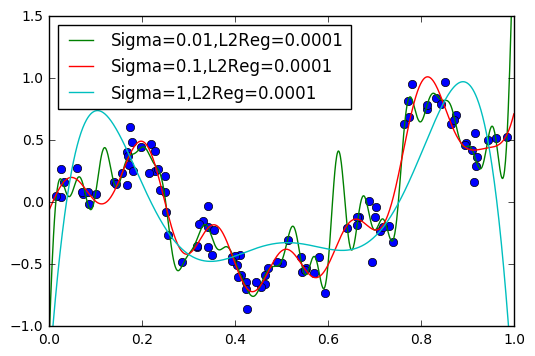

In [15]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

\newpage
## 8-3-4

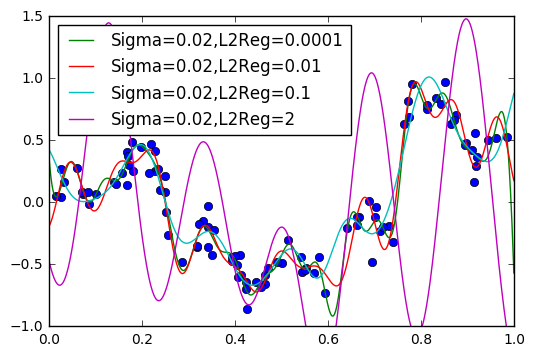

In [16]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

\newpage
## 8-3-5

In [17]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 

In [18]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [19]:
param_grid = [{'kernel': ['RBF'],'sigma':np.exp2(-np.arange(-5,5,0.1)), 'l2reg': np.exp2(-np.arange(-5,5,0.1))},
              {'kernel':['polynomial'],'offset':np.arange(-2,2,0.1), 'degree':np.arange(2,10,1),'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['RBF'], 'sigma': array([ 32.     ,  29.85706, ...,   0.0359 ,   0.03349]), 'l2reg': array([ 32.     ,  29.85706, ...,   0.0359 ,   0.03349])}, {'kernel': ['polynomial'], 'l2reg': [10, 0.1, 0.01], 'degree': array([2, 3, 4, 5, 6, 7, 8, 9]), 'offset': array([ -2.00000e+00,  -1.9...+00,   1.70000e+00,   1.80000e+00,   1.90000e+00])}, {'kernel': ['linear'], 'l2reg': [10, 1, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [20]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
#df_toshow.sort_values(by=["mean_test_score"])
df_RBF = df_toshow[df_toshow['param_kernel']=='RBF']
df_RBF = df_RBF.sort_values(by=["mean_test_score"])

In [21]:
df_poly = df_toshow[df_toshow['param_kernel']=='polynomial']
df_poly = df_poly.sort_values(by=["mean_test_score"])

\newpage
## 8-3-6

In [22]:
#Stroe best parameter settings from the sorted parameters grid generated from 8-5-5
best_pm_poly = df_poly.iloc[0]
best_pm_RBF = df_RBF.iloc[0]
print(best_pm_poly)
print('')
print(best_pm_RBF)

param_degree                 9
param_kernel        polynomial
param_l2reg               0.01
param_offset              -1.2
param_sigma                  -
mean_test_score      0.0313317
mean_train_score     0.0417443
Name: 10928, dtype: object

param_degree                -
param_kernel              RBF
param_l2reg         0.0334929
param_offset                -
param_sigma         0.0717936
mean_test_score     0.0211905
mean_train_score    0.0241542
Name: 9988, dtype: object


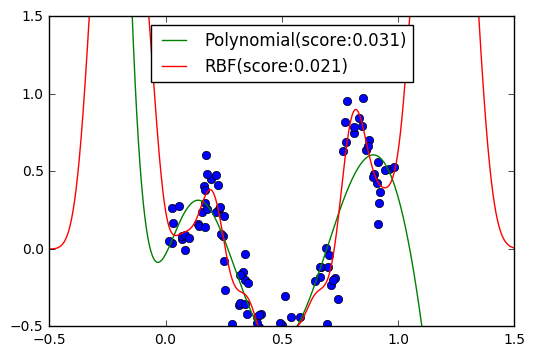

In [23]:
#Best setting polynomial kernel
plot_step = .001
xpts = np.arange(-0.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
degree=best_pm_poly['param_degree']
offset=best_pm_poly['param_offset']
sigma= best_pm_RBF['param_sigma']
score_RBF = best_pm_RBF['mean_test_score']
score_poly = best_pm_poly['mean_test_score']
for l2reg in [best_pm_poly['param_l2reg']]:
    k = functools.partial(polynomial_kernel,degree=degree,offset=offset)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Polynomial(score:%.3f)"%(score_poly)
    plt.plot(xpts, f.predict(xpts), label=label)
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = 'RBF(score:%.3f)'%(score_RBF)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-0.5,1.5)
plt.show()

As we have derived in Assignment 1, the bayes decision function for square loss for given $X~Y$ is $E[y|x]$. In this case $E[y|x]=E[f(x)+\epsilon]=f(x)$. Also we derived that the associated bayes risk is $var(y|x)$. In this case, since $f(x)$ is uncorrelated with $\epsilon$, $var(y|x)=var(f(x)+\epsilon)+var(f(x))+var(\epsilon)=var(\epsilon)=0.1$